# 4. Spectral Analysis and Filtering

* 싸이지먼트 / 계량경제R + 금융공학Py
* 김무성

# Contents

* 4.1 Introduction
* 4.2 Cyclical Behavior and Periodicity
* 4.3 The Spectral Density
* 4.4 Periodogram and Discrete Fourier Transform
* 4.5 NonparametricSpectralEstimation
* 4.6 Parametric Spectral Estimation
* 4.7 Linear Filters
* 4.8 Multiple Series and Cross-Spectra

# 4.1 Introduction

# 4.2 Cyclical Behavior and Periodicity

<img src="figures/eq4.1.png" width=600 />

<img src="figures/eq4.2.png" width=600 />

<img src="figures/eq4.3.png" width=600 />

<img src="figures/eq4.4.png" width=600 />

<img src="figures/eq4.5.png" width=600 />

<img src="figures/eq4.6.png" width=600 />

### Example 4.1 A Periodic Series

<img src="figures/ex4.1_1.png" width=600 />

<img src="figures/ex4.1_2.png" width=600 />

<img src="figures/fig4.1.png" width=600 />

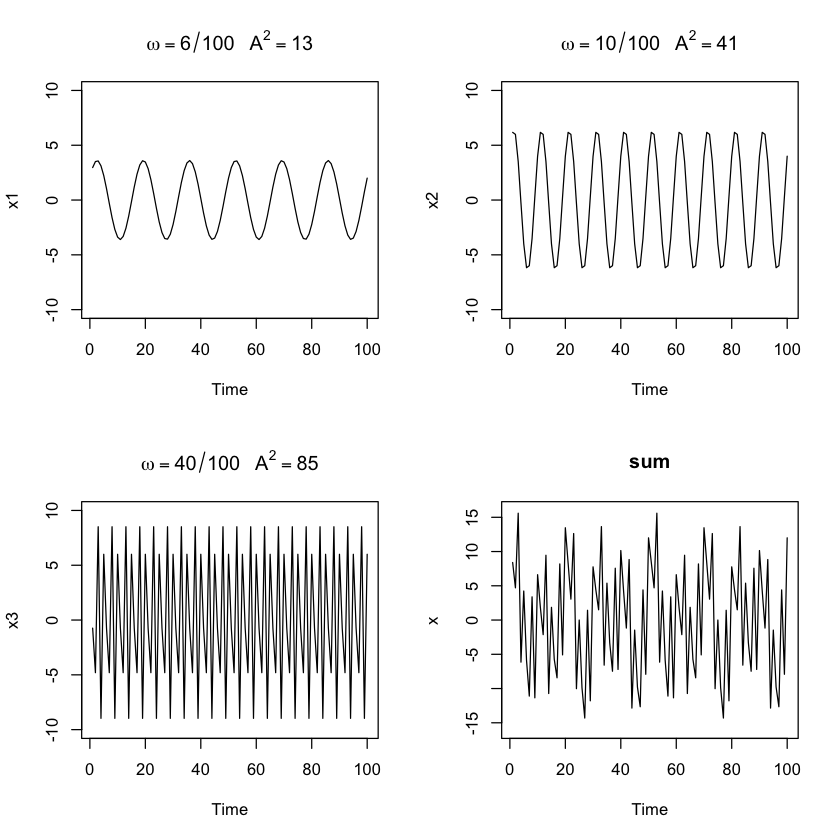

In [2]:
x1 = 2*cos(2*pi*1:100*6/100) + 3*sin(2*pi*1:100*6/100)
x2 = 4*cos(2*pi*1:100*10/100) + 5*sin(2*pi*1:100*10/100)
x3 = 6*cos(2*pi*1:100*40/100) + 7*sin(2*pi*1:100*40/100)
x = x1 + x2 + x3
par(mfrow=c(2,2))
plot.ts(x1, ylim=c(-10,10), main=expression(omega==6/100~~~A^2==13)) 
plot.ts(x2, ylim=c(-10,10), main=expression(omega==10/100~~~A^2==41)) 
plot.ts(x3, ylim=c(-10,10), main=expression(omega==40/100~~~A^2==85)) 
plot.ts(x, ylim=c(-16,16), main="sum")

### Example 4.2 Estimation and the Periodogram

<img src="figures/eq4.7.png" width=600 />

<img src="figures/ex4.2.png" width=600 />

<img src="figures/eq4.8.png" width=600 />

<img src="figures/eq4.9.png" width=600 />

<img src="figures/eq4.10.png" width=600 />

<img src="figures/eq4.11.png" width=600 />

<img src="figures/ex4.2_2.png" width=600 />

<img src="figures/ex4.2_3.png" width=600 />

<img src="figures/fig4.2.png" width=600 />

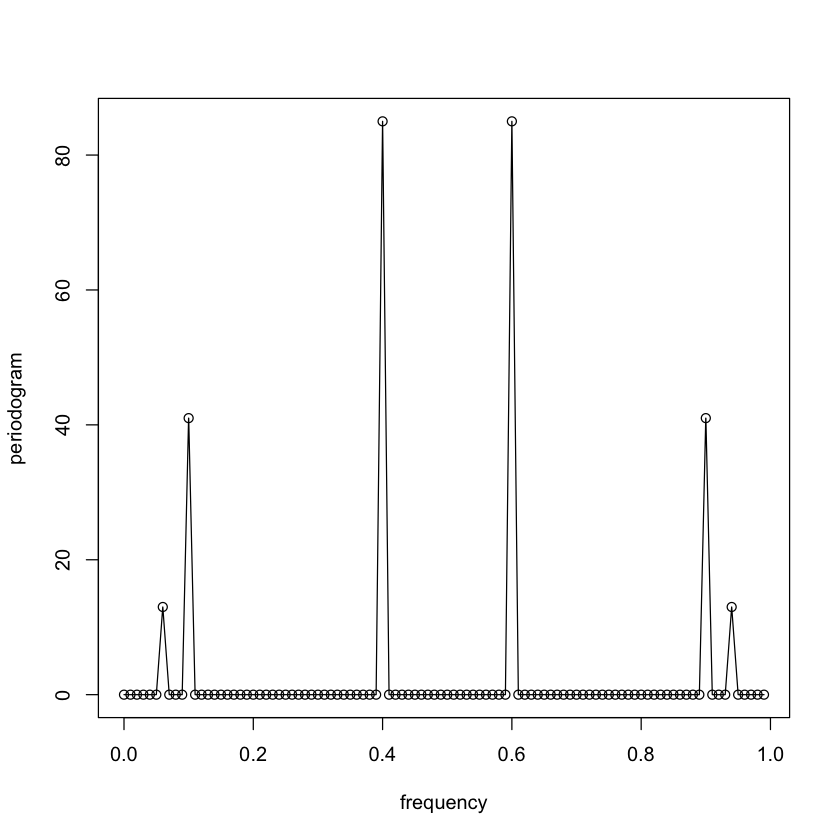

In [3]:
P = abs(2*fft(x)/100)^2; Fr = 0:99/100
plot(Fr, P, type="o", xlab="frequency", ylab="periodogram")

### Example 4.3 Star Magnitude

<img src="figures/fig4.3.png" width=600 />

[1] 28.57143

[1] 25

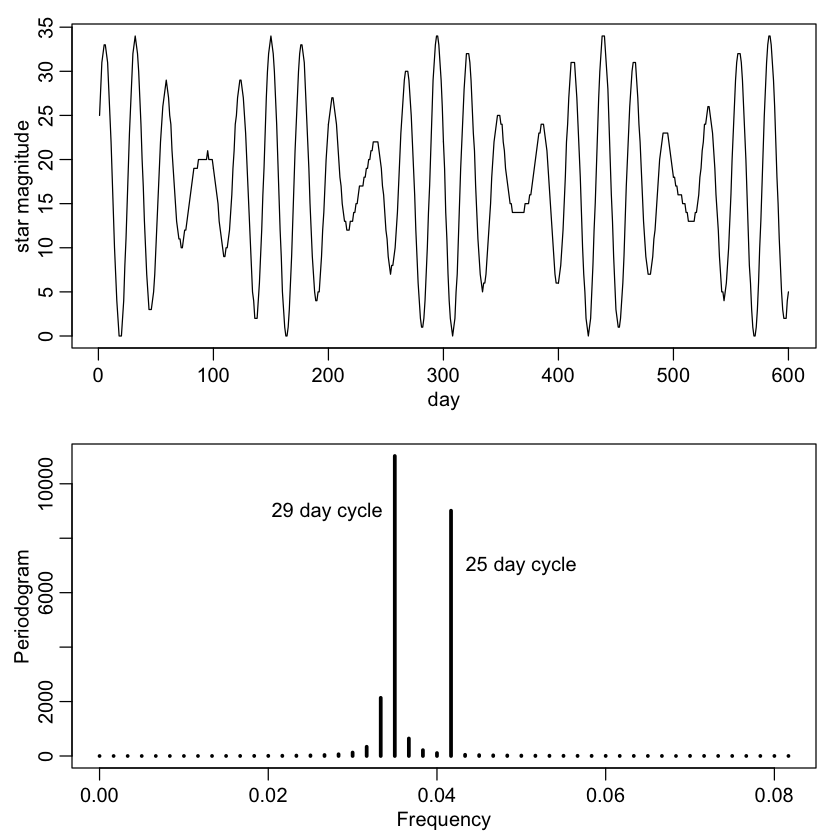

In [6]:
star = url("http://www.stat.pitt.edu/stoffer/tsa3/star.rda") 
load(star);
n = length(star)
par(mfrow=c(2,1), mar=c(3,3,1,1), mgp=c(1.6,.6,0))
plot(star, ylab="star magnitude", xlab="day")
Per = Mod(fft(star-mean(star)))^2/n
Freq = (1:n -1)/n
plot(Freq[1:50], Per[1:50], type='h', lwd=3, ylab="Periodogram", xlab="Frequency")
u = which.max(Per[1:50])
uu = which.max(Per[1:50][-u])
1/Freq[22]; 1/Freq[25]
text(.05, 7000, "25 day cycle"); text(.027, 9000, "29 day cycle")

# 4.3 The Spectral Density

<img src="figures/prop4.1.png" width=600 />

<img src="figures/ex4.3_1.png" />

<img src="figures/ex4.3_2.png" />

### Example 4.4 White Noise Series

<img src="figures/ex4.4.png" />

<img src="figures/prop4.2.png" width=600 />

### Example 4.5 Moving Average

<img src="figures/ex4.5_1.png" />

<img src="figures/ex4.5_2.png" width=600 />

<img src="figures/eq4.16.png" width=600 />

<img src="figures/ex4.5_3.png" width=600 />

### Example 4.6 A Second-Order Autoregressive Series

<img src="figures/ex4.6.png" />

<img src="figures/ex4.6_2.png" width=600 />

<img src="figures/ex4.6_3.png" width=600 />

<img src="figures/fig4.4.png" width=600 />

In [13]:
#install.packages("astsa")
library(astsa)

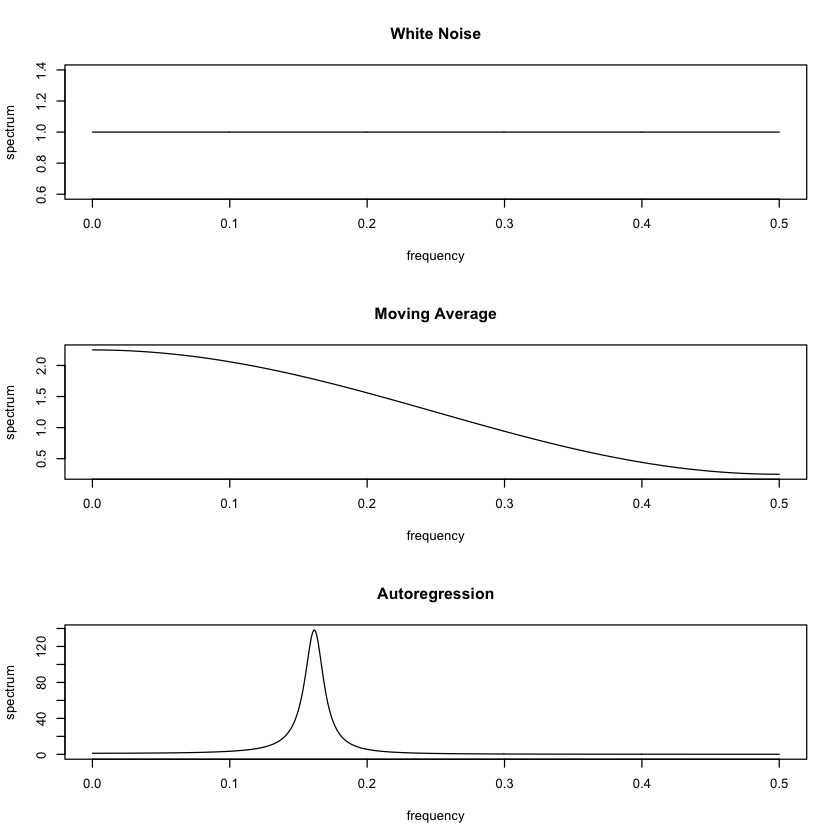

In [14]:
par(mfrow=c(3,1))
arma.spec(log="no", main="White Noise")
arma.spec(ma=.5, log="no", main="Moving Average") 
arma.spec(ar=c(1,-.9), log="no", main="Autoregression")

# 4.4 Periodogram and Discrete Fourier Transform

<img src="figures/def4.1.png" width=600 />

<img src="figures/eq4.18.png" width=600 />

In [15]:
(dft = fft(1:4)/sqrt(4))

[1]  5+0i -1+1i -1+0i -1-1i

In [16]:
(idft = fft(dft, inverse=TRUE)/sqrt(4))

[1] 1+0i 2+0i 3+0i 4+0i

In [17]:
(Re(idft)) # keep it real

[1] 1 2 3 4

<img src="figures/def4.2.png" width=600 />

<img src="figures/eq4.20.png" width=600 />

<img src="figures/def4.3.png" width=600 />

<img src="figures/eq4.23.png" width=600 />

<img src="figures/eq4.24.png" width=600 />

<img src="figures/eq4.27a.png" width=600 />

<img src="figures/eq4.25.png" width=600 />

<img src="figures/prop4.3.png" width=600 />

<img src="figures/eq4.28.png" width=600 />

<img src="figures/eq4.29.png" width=600 />

### Example 4.7 Periodogram of SOI and Recruitment Series

<img src="figures/fig4.5.png" width=600 />

<img src="figures/ex4.7.png" width=600 />

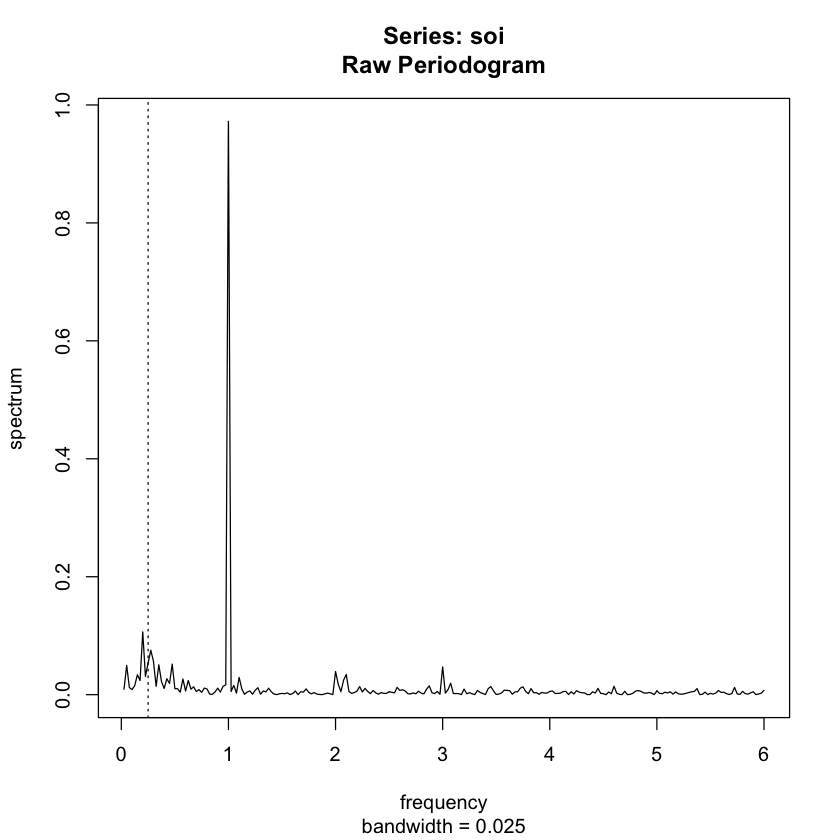

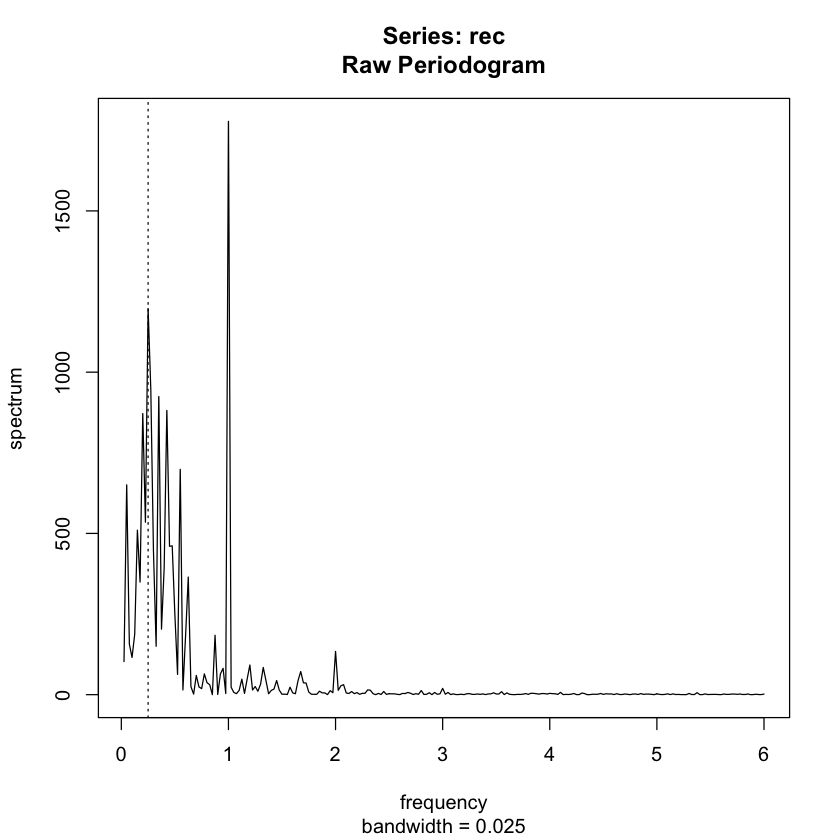

In [18]:
require(astsa) # needed for mvspec() - otherwise use spec.pgram() par(mfrow=c(2,1))
soi.per = mvspec(soi, log="no"); abline(v=1/4, lty="dotted")
rec.per = mvspec(rec, log="no"); abline(v=1/4, lty="dotted")

In [22]:
soi.per$spec[40] # 0.97223
#soi pgram at freq 1/12 = 40/480 
soi.per$spec[10] # 0.05372
#soi pgram at freq 1/48  = 10/480
# conf intervals - returned value: 
U = qchisq(.025,2) # 0.05063
L = qchisq(.975,2) # 7.37775
2*soi.per$spec[10]/L # 0.01456 
2*soi.per$spec[10]/U # 2.12220 
2*soi.per$spec[40]/L # 0.26355 
2*soi.per$spec[40]/U # 38.40108

[1] 0.9722312

[1] 0.05372962

[1] 0.0145653

[1] 2.122207

[1] 0.2635573

[1] 38.40108

<img src="figures/fig4.6.png" width=600 />

<img src="figures/fig4.7.png" width=600 />

# 4.5 NonparametricSpectralEstimation

<img src="figures/eq4.30.png" width=600 />

<img src="figures/cap4.5.png" />

<img src="figures/eq4.32.png" width=600 />

<img src="figures/fig4.8.png" width=600 />

<img src="figures/eq4.33.png" width=600 />

<img src="figures/eq4.34.png" width=600 />

<img src="figures/eq4.35.png" width=600 />

<img src="figures/eq4.36.png" width=600 />

<img src="figures/eq4.37.png" width=600 />

<img src="figures/eq4.38.png" width=600 />

<img src="figures/eq4.39.png" width=600 />

### Example 4.8 Averaged Periodogram for SOI and Recruitment

<img src="figures/fig4.9.png" width=600 />

Daniell(4) 
coef[-4] = 0.1111
coef[-3] = 0.1111
coef[-2] = 0.1111
coef[-1] = 0.1111
coef[ 0] = 0.1111
coef[ 1] = 0.1111
coef[ 2] = 0.1111
coef[ 3] = 0.1111
coef[ 4] = 0.1111

[1] 0.225

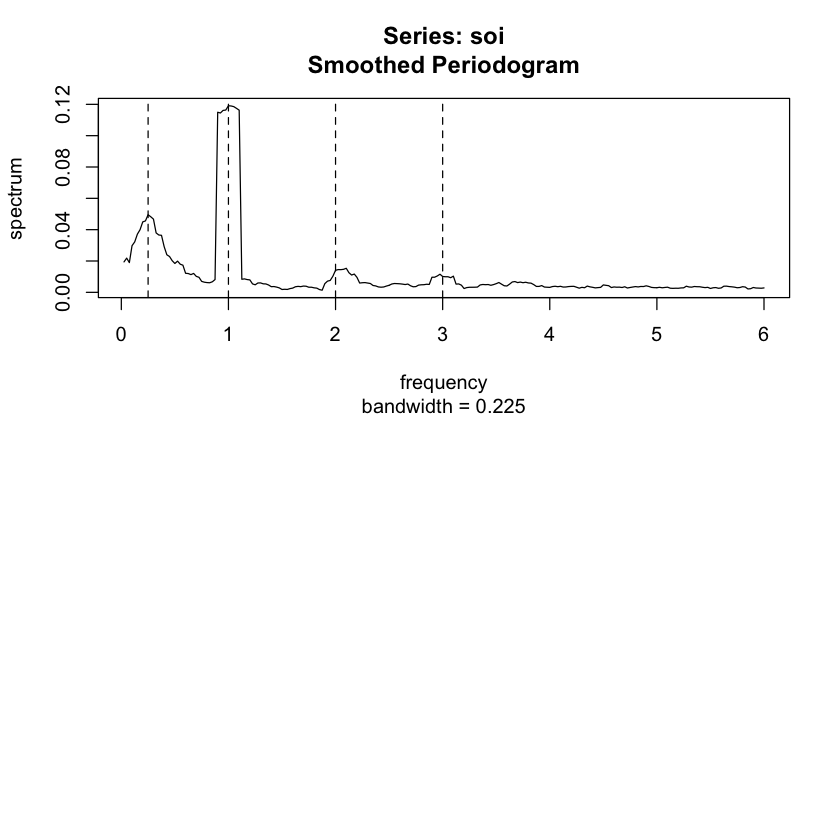

In [25]:
par(mfrow=c(2,1))
(k = kernel("daniell", 4))
soi.ave = mvspec(soi, k, log="no") 
abline(v=c(.25,1,2,3), lty=2)
# Repeat above lines using rec in place of soi on line 3 
soi.ave$bandwidth # = 0.225

<img src="figures/tbl4.1.png" width=600 />

In [27]:
df = soi.ave$df # df = 16.9875 (returned values)
U = qchisq(.025, df) # U = 7.555916
L = qchisq(.975, df) # L = 30.17425
soi.ave$spec[10]
soi.ave$spec[40]
# intervals
df*soi.ave$spec[10]/L
df*soi.ave$spec[10]/U
df*soi.ave$spec[40]/L
df*soi.ave$spec[40]/U
# repeat above commands with soi replaced by rec

[1] 0.04952026

[1] 0.11908

[1] 0.02787891

[1] 0.1113333

[1] 0.06703963

[1] 0.2677201

<img src="figures/fig4.10.png" width=600 />

### Example 4.9 Harmonics

<img src="figures/fig4.11.png" width=600 />

<img src="figures/eq4.41.png" width=600 />

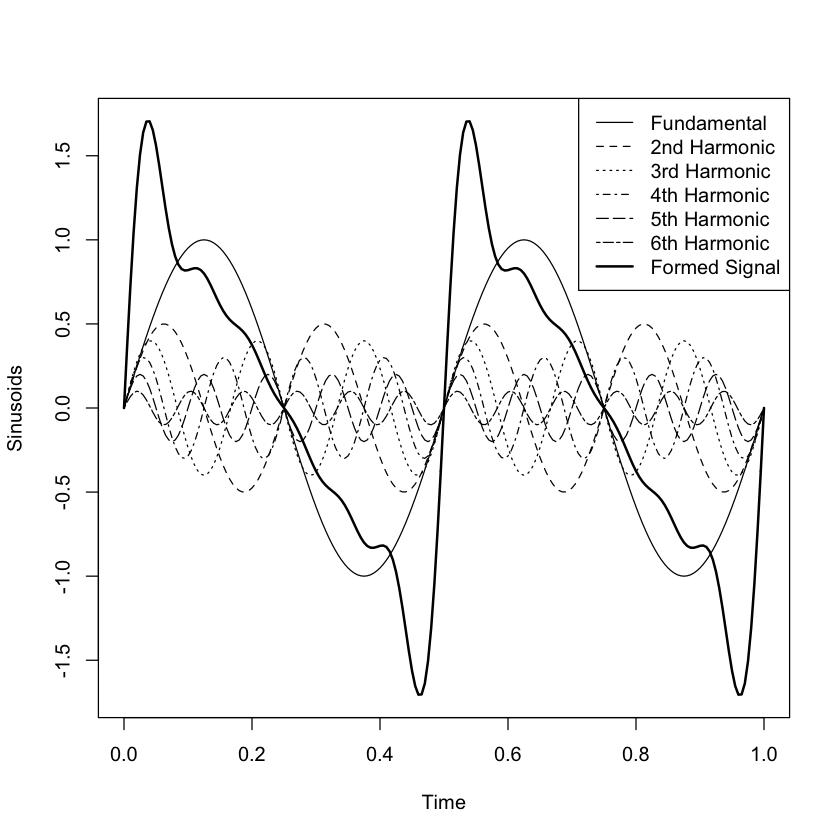

In [28]:
t = seq(0, 1, by=1/200)
amps = c(1, .5, .4, .3, .2, .1)
x = matrix(0, 201, 6)
for (j in 1:6) x[,j] = amps[j]*sin(2*pi*t*2*j)
x = ts(cbind(x, rowSums(x)), start=0, deltat=1/200)
ts.plot(x, lty=c(1:6, 1), lwd=c(rep(1,6), 2), ylab="Sinusoids")
names = c("Fundamental","2nd Harmonic","3rd Harmonic","4th Harmonic", "5th Harmonic", "6th Harmonic", "Formed Signal")
legend("topright", names, lty=c(1:6, 1), lwd=c(rep(1,6), 2))

<img src="figures/eq4.42.png" width=600 />

<img src="figures/ex4.9.png" />

<img src="figures/eq4.43.png" width=600 />

<img src="figures/eq4.44.png" width=600 />

<img src="figures/ex4.8_2.png" width=600 />

<img src="figures/ex4.8_3.png" width=600 />

### Example 4.10 Smoothed Periodogram for SOI and Recruitment

<img src="figures/fig4.12.png" width=600 />

mDaniell(3,3) 
coef[-6] = 0.006944
coef[-5] = 0.027778
coef[-4] = 0.055556
coef[-3] = 0.083333
coef[-2] = 0.111111
coef[-1] = 0.138889
coef[ 0] = 0.152778
coef[ 1] = 0.138889
coef[ 2] = 0.111111
coef[ 3] = 0.083333
coef[ 4] = 0.055556
coef[ 5] = 0.027778
coef[ 6] = 0.006944

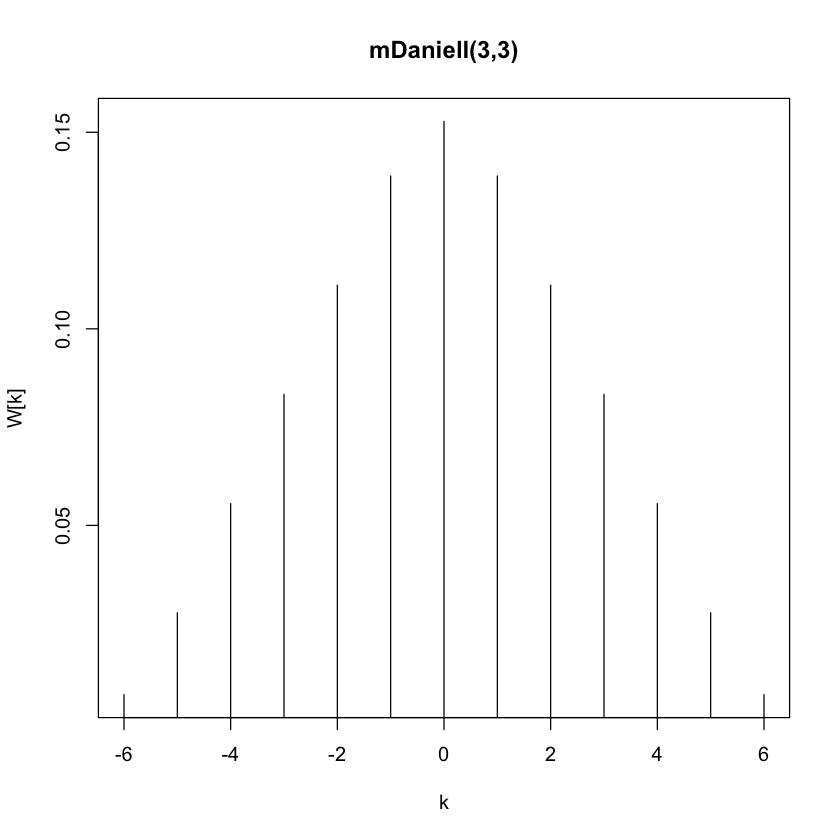

In [29]:
kernel("modified.daniell", c(3,3)) # for a list 
plot(kernel("modified.daniell", c(3,3))) # for a plot

<img src="figures/fig4.13.png" width=600 />

[1] 0.2308103

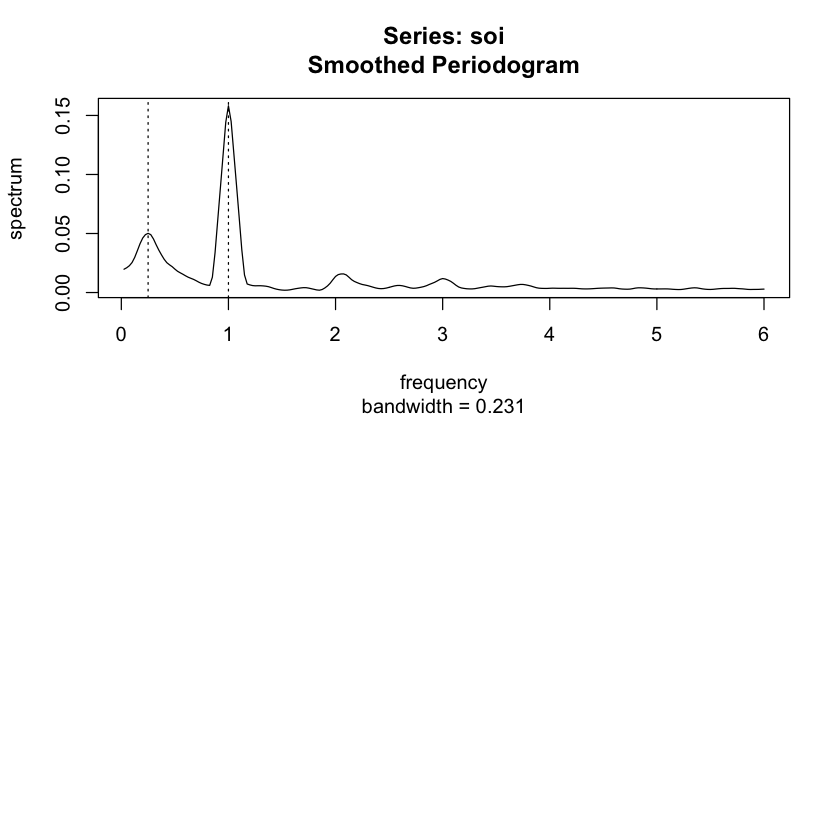

In [30]:
par(mfrow=c(2,1))
k = kernel("modified.daniell", c(3,3))
soi.smo = mvspec(soi, k, log="no")
abline(v=1, lty="dotted"); abline(v=1/4, lty="dotted")
## Repeat above lines with rec replacing soi in line 3
df = soi.smo$df # df = 17.42618
soi.smo$bandwidth # Bw = 0.2308103 = 12*9.232/480

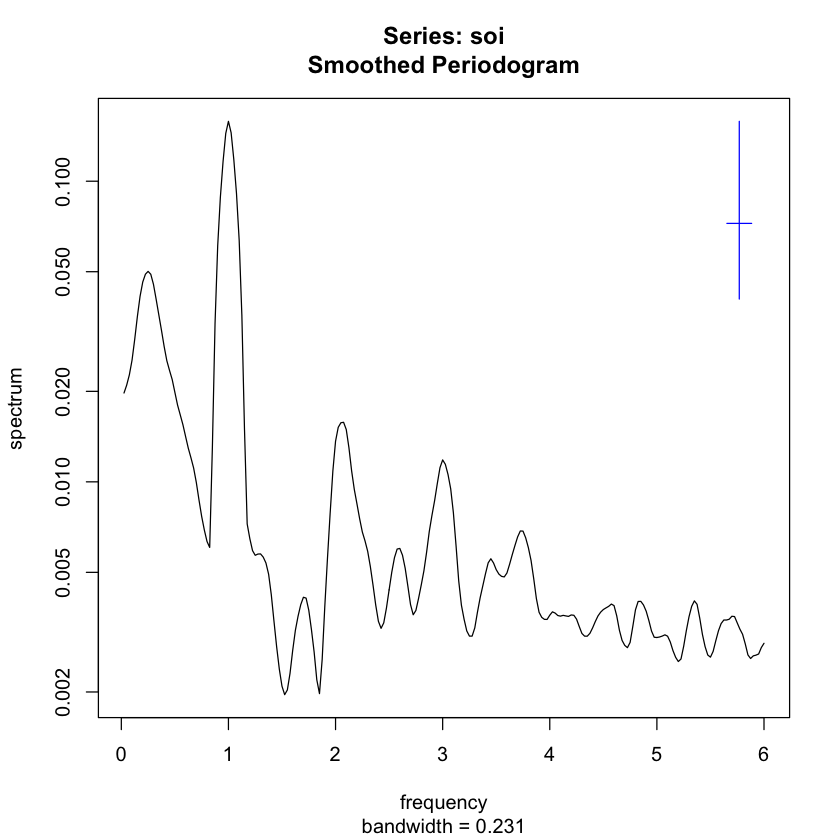

In [31]:
soi.smo = mvspec(soi, spans=c(7,7))

#### Tapering

<img src="figures/eq4.48.png" width=600 />

<img src="figures/fig4.14.png" width=600 />

In [ ]:
# ---------------------------------

In [1]:
<img src="figures/cap4.7.png" width=600 />
<img src="figures/ex4.15.png" width=600 />
<img src="figures/ex4.14.png" width=600 />
<img src="figures/ex4.13.png" width=600 />


<img src="figures/prop4.6.png" width=600 />
<img src="figures/prop4.5.png" width=600 />
<img src="figures/prop4.4.png" width=600 />
<img src="figures/fig4.21.png" width=600 />
<img src="figures/fig4.20.png" width=600 />
<img src="figures/fig4.19.png" width=600 />
<img src="figures/fig4.18.png" width=600 />
<img src="figures/fig4.17.png" width=600 />
<img src="figures/fig4.16.png" width=600 />
<img src="figures/fig4.15.png" width=600 />



<img src="figures/eq4.80.png" width=600 />
<img src="figures/eq4.73.png" width=600 />
<img src="figures/eq4.69.png" width=600 />
<img src="figures/eq4.61.png" width=600 />
<img src="figures/eq4.60.png" width=600 />
<img src="figures/eq4.59.png" width=600 />
<img src="figures/eq4.57.png" width=600 />
<img src="figures/eq4.56.png" width=600 />
<img src="figures/eq4.54.png" width=600 />



ERROR: Error in !ls: 잘못된 인자의 유형입니다


# 4.6 Parametric Spectral Estimation

# 4.7 Linear Filters

# 4.8 Multiple Series and Cross-Spectra

# 참고자료